# **Project Name**    - DeepFish: Multiclass Fish Image Classifier



##### **Project Type**    - Classification
##### **Contribution**    - Individual
##### **Name**            - Alwin Shaji


# **Project Summary**

The aim of this project is to develop a deep learning-based image classification system capable of accurately identifying and categorizing fish species from images. This task has real-world relevance in areas such as marine biology, fishery monitoring, and ecological conservation, where automated classification can significantly reduce manual effort and errors. The project will involve building and comparing multiple deep learning models, starting from a custom Convolutional Neural Network (CNN) and progressing to powerful pre-trained architectures through transfer learning.

To begin with, I will work with a dataset organized into folders where each folder represents a unique fish species. Before model training, I will perform essential data preprocessing and cleaning steps. This will include verifying the integrity of images, removing any corrupt or irrelevant files and standardizing the image format and size. Since real-world image datasets often suffer from inconsistencies and noise, this step will be crucial in ensuring reliable input for the models.

Following cleaning, I will carry out data transformation using TensorFlow’s ImageDataGenerator. This will involve operations such as rescaling, rotation, flipping, zooming, and shifting to augment the dataset and improve the model’s generalization. This is especially important given that the dataset is imbalanced, with certain fish species being overrepresented. To address this, I will compute and apply class weights during model training so that minority classes are given appropriate importance, ensuring fairer and more balanced learning.

I plan to build a baseline CNN model from scratch to understand the dataset’s behavior and evaluate how a custom architecture performs without any external knowledge. After this, I will experiment with transfer learning using several state-of-the-art models such as ResNet50, MobileNet, InceptionV3, and EfficientNetB0. These pre-trained models, originally trained on the ImageNet dataset, are known for their strong performance and generalization capabilities. I will fine-tune these models to suit the fish classification task by freezing some layers and training others specific to our domain.

Each model will be trained and evaluated based on metrics like accuracy, precision, recall, F1-score and confusion matrix. I will also visualize training history to monitor overfitting and convergence. The best-performing models will be saved in .h5 or .pkl format for future use or deployment.

For the final stage of the project, I will build a Streamlit web application to make the fish classification model interactive and user-friendly. This app will allow users to upload an image of a fish and receive real-time predictions about the species. This deployment step will serve as a practical demonstration of how deep learning models can be converted into accessible tools for end users.

Overall, this project will take me through the full deep learning pipeline: from raw image data to a clean and transformed dataset, followed by model training, evaluation and deployment. By the end of it, I will have a working system that not only classifies fish species accurately but is also accessible through a simple web interface.




# **GitHub Link**

https://github.com/alwinshaji/DeepFish-Multiclass-Fish-Image-Classification.git

# **Problem Statement**


This project focuses on classifying fish images into multiple categories using deep learning models. The task involves training a CNN from scratch and leveraging transfer learning with pre-trained models to enhance performance. The project also includes saving models for later use and deploying a Streamlit application to predict fish categories from user-uploaded images.


# **General Guidelines** : -  

1.   Well-structured, formatted, and commented code is required.
2.   Exception Handling, Production Grade Code & Deployment Ready Code will be a plus. Those students will be awarded some additional credits.
     
     The additional credits will have advantages over other students during Star Student selection.
       
             [ Note: - Deployment Ready Code is defined as, the whole .ipynb notebook should be executable in one go
                       without a single error logged. ]

3.   Each and every logic should have proper comments.
4. You may add as many number of charts you want. Make Sure for each and every chart the following format should be answered.
        

```
# Chart visualization code
```
            

*   Why did you pick the specific chart?
*   What is/are the insight(s) found from the chart?
* Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

5. You have to create at least 15 logical & meaningful charts having important insights.


[ Hints : - Do the Vizualization in  a structured way while following "UBM" Rule.

U - Univariate Analysis,

B - Bivariate Analysis (Numerical - Categorical, Numerical - Numerical, Categorical - Categorical)

M - Multivariate Analysis
 ]





6. You may add more ml algorithms for model creation. Make sure for each and every algorithm, the following format should be answered.


*   Explain the ML Model used and it's performance using Evaluation metric Score Chart.


*   Cross- Validation & Hyperparameter Tuning

*   Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

*   Explain each evaluation metric's indication towards business and the business impact pf the ML model used.




















# ***Let's Begin !***

## ***1. Know Your Data***

### Import Libraries

### Dataset Loading

In [ ]:
from google.colab import drive
drive.mount('/content/drive')


Mounted at /content/drive


In [ ]:
import zipfile

zip_path = '/content/drive/MyDrive/Dataset.zip'  # your zip file location
extract_path = '/content/dataset'  # where to unzip

with zipfile.ZipFile(zip_path, 'r') as zip_ref:
    zip_ref.extractall(extract_path)


In [ ]:

import shutil
import os

src_root = '/content/dataset/images.cv_jzk6llhf18tm3k0kyttxz/data'
dst_root = '/content/fish_data'

# Create the new folder if it doesn't exist
if not os.path.exists(dst_root):
    os.makedirs(dst_root)

# Copy each split
for folder in ['train', 'val', 'test']:
    src = os.path.join(src_root, folder)
    dst = os.path.join(dst_root, folder)
    if os.path.exists(dst):
        print(f"{folder} already copied.")
    else:
        shutil.copytree(src, dst)
        print(f"✅ Copied {folder} to fish_data.")


✅ Copied train to fish_data.
✅ Copied val to fish_data.
✅ Copied test to fish_data.


### Dataset First View

In [ ]:
import os
from collections import defaultdict

data_dir = '/content/fish_data'
splits = ['train', 'val', 'test']
class_counts = defaultdict(dict)

for split in splits:
    split_path = os.path.join(data_dir, split)
    print(f"\n📂 {split.upper()} SPLIT:")
    if not os.path.exists(split_path):
        print("   ❌ Not found!")
        continue

    for cls in sorted(os.listdir(split_path)):
        cls_path = os.path.join(split_path, cls)
        if os.path.isdir(cls_path):
            count = len(os.listdir(cls_path))
            class_counts[split][cls] = count
            print(f"   {cls}: {count} images")



📂 TRAIN SPLIT:
   animal fish: 1096 images
   animal fish bass: 30 images
   fish sea_food black_sea_sprat: 569 images
   fish sea_food gilt_head_bream: 566 images
   fish sea_food hourse_mackerel: 573 images
   fish sea_food red_mullet: 579 images
   fish sea_food red_sea_bream: 571 images
   fish sea_food sea_bass: 538 images
   fish sea_food shrimp: 576 images
   fish sea_food striped_red_mullet: 547 images
   fish sea_food trout: 580 images

📂 VAL SPLIT:
   animal fish: 187 images
   animal fish bass: 10 images
   fish sea_food black_sea_sprat: 105 images
   fish sea_food gilt_head_bream: 94 images
   fish sea_food hourse_mackerel: 97 images
   fish sea_food red_mullet: 90 images
   fish sea_food red_sea_bream: 113 images
   fish sea_food sea_bass: 97 images
   fish sea_food shrimp: 100 images
   fish sea_food striped_red_mullet: 101 images
   fish sea_food trout: 98 images

📂 TEST SPLIT:
   animal fish: 520 images
   animal fish bass: 13 images
   fish sea_food black_sea_sprat: 2

### Dataset Rows & Columns count

In [ ]:
import os
import pandas as pd

# Point to your dataset
data_root = "/content/fish_data"

# Initialize a list to hold info
data = []

# Traverse each split
for split in ['train', 'val', 'test']:
    split_path = os.path.join(data_root, split)
    if os.path.exists(split_path):
        for label in os.listdir(split_path):
            label_path = os.path.join(split_path, label)
            if os.path.isdir(label_path):
                for file in os.listdir(label_path):
                    if file.lower().endswith(('.jpg', '.jpeg', '.png')):
                        data.append({
                            "split": split,
                            "label": label,
                            "filepath": os.path.join(label_path, file)
                        })

# Load into DataFrame
df = pd.DataFrame(data)

# Show stats
print(f"✅ Total images: {len(df)}\n")
print("📊 Sample rows:")
print(df.head())
print("\n🔢 Image count per split:")
print(df['split'].value_counts())
print("\n🧷 Image count per label:")
print(df['label'].value_counts())


✅ Total images: 10504

📊 Sample rows:
   split                 label  \
0  train  fish sea_food shrimp   
1  train  fish sea_food shrimp   
2  train  fish sea_food shrimp   
3  train  fish sea_food shrimp   
4  train  fish sea_food shrimp   

                                            filepath  
0  /content/fish_data/train/fish sea_food shrimp/...  
1  /content/fish_data/train/fish sea_food shrimp/...  
2  /content/fish_data/train/fish sea_food shrimp/...  
3  /content/fish_data/train/fish sea_food shrimp/...  
4  /content/fish_data/train/fish sea_food shrimp/...  

🔢 Image count per split:
split
train    6225
test     3187
val      1092
Name: count, dtype: int64

🧷 Image count per label:
label
animal fish                         1803
fish sea_food black_sea_sprat        972
fish sea_food trout                  970
fish sea_food shrimp                 965
fish sea_food gilt_head_bream        965
fish sea_food sea_bass               962
fish sea_food red_mullet             960
fish sea

### Dataset Information

In [ ]:
from PIL import Image
from tqdm import tqdm

# Add image size info
heights, widths = [], []

for path in tqdm(df['filepath'], desc="Reading image sizes"):
    with Image.open(path) as img:
        widths.append(img.width)
        heights.append(img.height)

df['width'] = widths
df['height'] = heights

print(f"\n📐 Image sizes (HxW):")
print(df[['height', 'width']].describe())


Reading image sizes: 100%|██████████| 10504/10504 [00:00<00:00, 15765.94it/s]


📐 Image sizes (HxW):
        height    width
count  10504.0  10504.0
mean     256.0    256.0
std        0.0      0.0
min      256.0    256.0
25%      256.0    256.0
50%      256.0    256.0
75%      256.0    256.0
max      256.0    256.0


### What did you know about your dataset?

The dataset is a well-organized collection of 10,504 fish images spread across `train`, `val`, and `test` folders, each containing subfolders for different fish species (the classes). All images are uniformly sized at 256×256 pixels, which makes preprocessing easier. The folder-based structure allows us to directly use tools like TensorFlow's `ImageDataGenerator` with labels inferred from directory names. This setup is ideal for training, validating, and testing deep learning models in the **DeepFish** classification project.


## ***3. Data Vizualization, Storytelling & Experimenting with charts : Understand the relationships between variables***

#### Chart - 1

/tmp/ipython-input-2100111735.py:8: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right', fontsize=9)


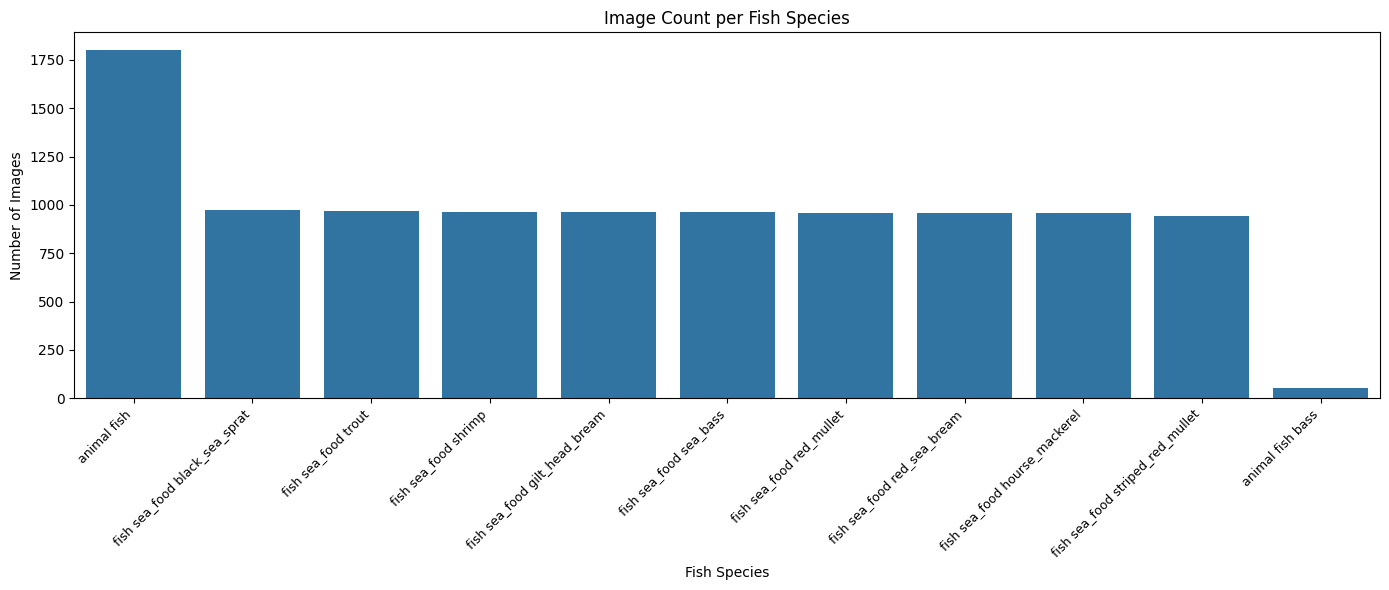

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(14, 6))
ax = sns.countplot(data=df, x='label', order=df['label'].value_counts().index)

# Rotate and align labels clearly
ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right', fontsize=9)

plt.title('Image Count per Fish Species')
plt.xlabel('Fish Species')
plt.ylabel('Number of Images')
plt.tight_layout()
plt.show()


##### 1. Why did you pick the specific chart?

This chart was used to visualize the total number of images available for each fish species in the entire dataset. It helps assess class balance before splitting the dataset.

##### 2. What is/are the insight(s) found from the chart?

We observed that some fish species had a significantly higher number of images compared to others, indicating a noticeable class imbalance. A few classes were underrepresented, which could bias the model during training.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Imbalanced data could lead to poor model generalization and high error rates for minority classes. This insight can prompt data augmentation or resampling strategies to ensure fair and consistent model performance across all fish species.

#### Chart - 2

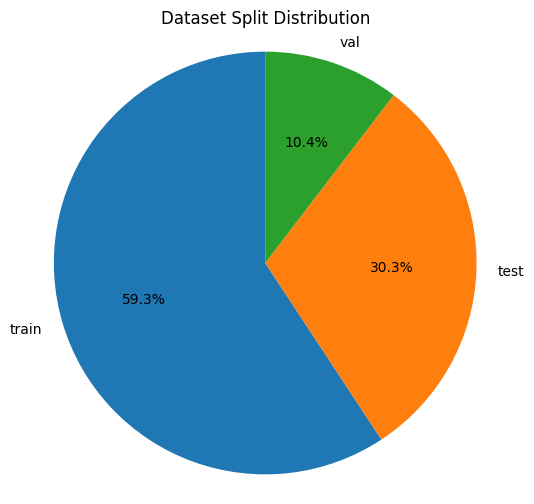

In [ ]:
split_counts = df['split'].value_counts()

plt.figure(figsize=(6, 6))
plt.pie(split_counts, labels=split_counts.index, autopct='%1.1f%%', startangle=90)
plt.title('Dataset Split Distribution')
plt.axis('equal')
plt.show()


##### 1. Why did you pick the specific chart?

The pie chart shows how the dataset was divided into training, validation, and test sets. It's important to confirm that the data has been appropriately split for robust model evaluation.

##### 2. What is/are the insight(s) found from the chart?

The dataset was split roughly in a 60-30-10 ratio among train, validation, and test sets. This ensures enough data for learning while keeping separate sets for tuning and final evaluation.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Proper dataset splitting prevents data leakage and allows accurate measurement of model performance, which is critical before deploying the model in any production environment.

#### Chart - 3

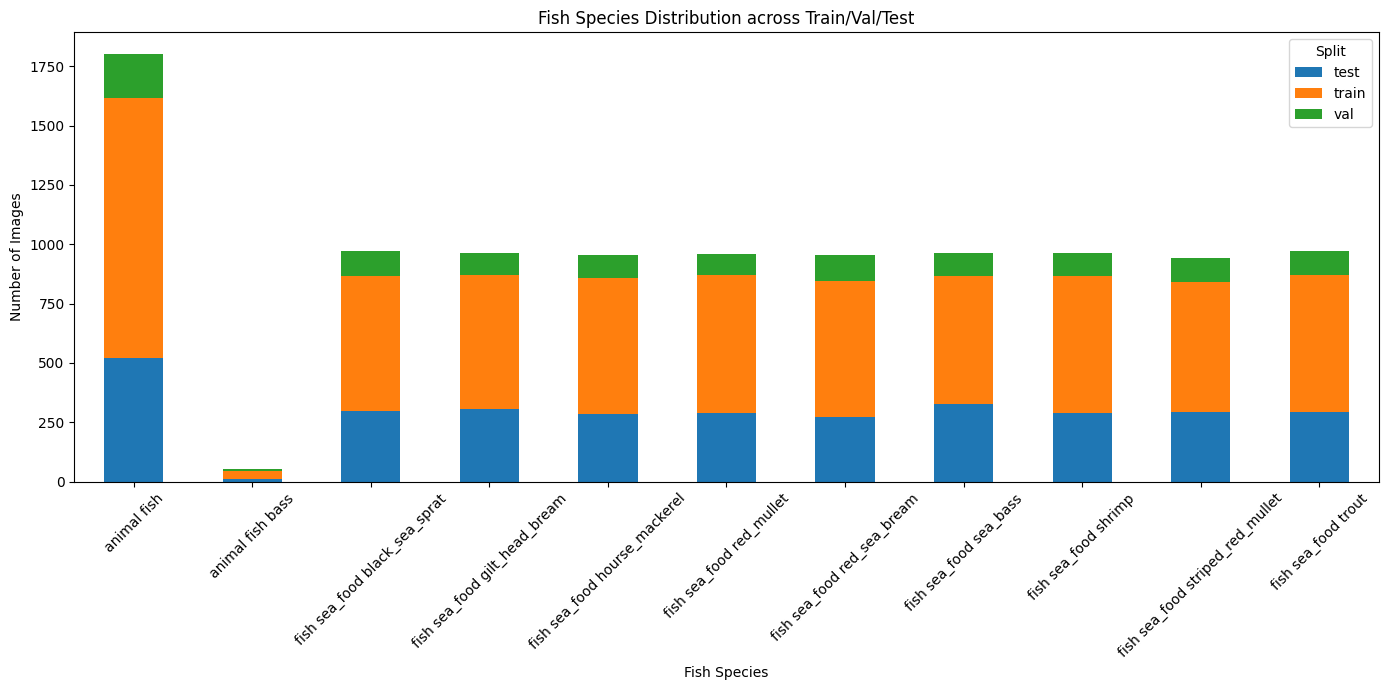

In [ ]:
split_class_counts = df.groupby(['split', 'label']).size().unstack(fill_value=0)

split_class_counts.T.plot(kind='bar', stacked=True, figsize=(14, 7))
plt.title('Fish Species Distribution across Train/Val/Test')
plt.xlabel('Fish Species')
plt.ylabel('Number of Images')
plt.xticks(rotation=45)
plt.legend(title='Split')
plt.tight_layout()
plt.show()


##### 1. Why did you pick the specific chart?

This grouped bar chart shows how each fish species is distributed across training, validation, and test sets. It helps verify that each class is represented fairly in all splits.

##### 2. What is/are the insight(s) found from the chart?

Most species are well represented in each split, though a few classes with fewer total images are only marginally present in validation or test sets. This might affect the model’s ability to generalize on those classes.



##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Ensuring balanced representation across splits prevents biased validation results and unreliable test accuracy. This directly impacts the credibility of model performance metrics during business decision-making.



#### Chart - 4

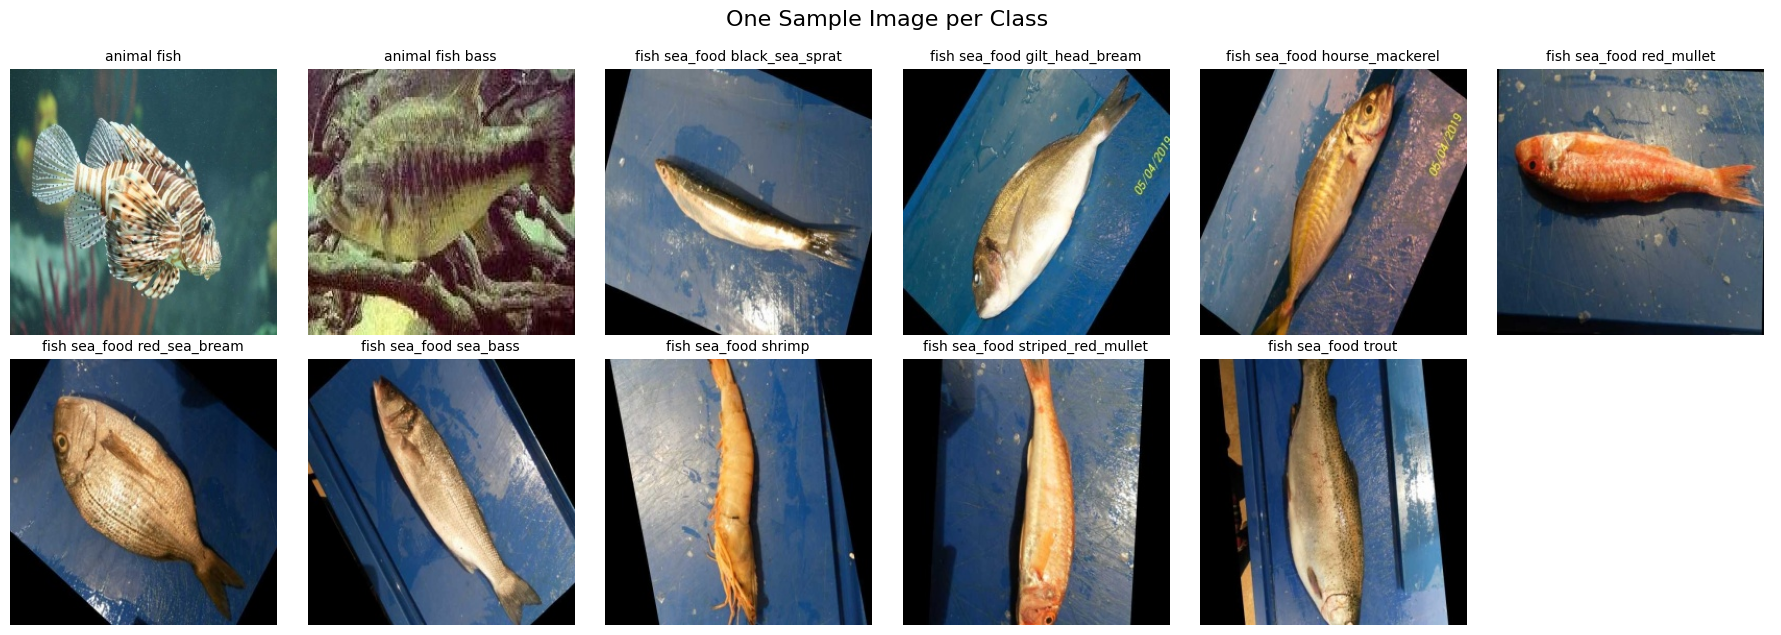

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import numpy as np

# Sample one image per label
unique_samples = (
    df.groupby('label', group_keys=False)[['split', 'label', 'filepath', 'width', 'height']]
      .apply(lambda x: x.sample(1, random_state=42))
      .reset_index(drop=True)
)

num_images = len(unique_samples)
cols_first_row = 6
cols_second_row = num_images - cols_first_row
rows = 2

# Create subplots with dynamic col layout
fig, axes = plt.subplots(rows, max(cols_first_row, cols_second_row), figsize=(18, 6))

# Flatten axes
axes = np.array(axes).reshape(-1)

# Plot each image
for idx, (i, row) in enumerate(unique_samples.iterrows()):
    img = mpimg.imread(row['filepath'])
    axes[idx].imshow(img)
    axes[idx].set_title(row['label'], fontsize=10)
    axes[idx].axis('off')

# Hide unused axes
for ax in axes[num_images:]:
    ax.axis('off')

plt.tight_layout()
plt.suptitle("One Sample Image per Class", fontsize=16, y=1.05)
plt.show()


##### 1. Why did you pick the specific chart?

This visualization displays a single image from each fish species, giving a quick look at visual differences across classes. It helps to manually inspect and validate image quality and labeling.

##### 2. What is/are the insight(s) found from the chart?

While some species appear highly distinct, others share similar visual features like color or shape, making them harder to distinguish. Image quality also varies slightly between classes.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Understanding visual overlap helps anticipate classification challenges and sets realistic expectations. It can also inform the need for more diverse image data or advanced models for species with subtle differences.

#### Chart - 5

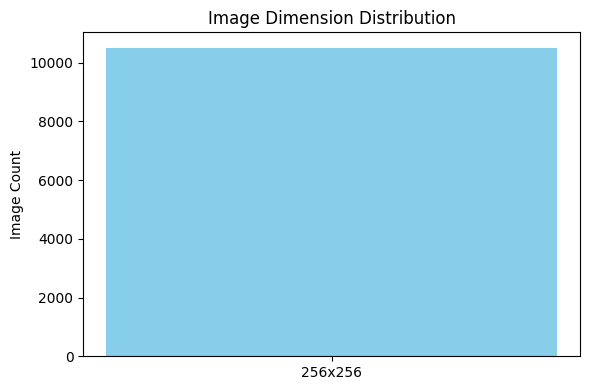

In [ ]:
import matplotlib.pyplot as plt

# Count unique dimension pairs
dimension_counts = df.groupby(['width', 'height']).size().reset_index(name='count')

# Plot
plt.figure(figsize=(6, 4))
plt.bar(['256x256'], [dimension_counts['count'].iloc[0]], color='skyblue')
plt.title('Image Dimension Distribution')
plt.ylabel('Image Count')
plt.tight_layout()
plt.show()



##### 1. Why did you pick the specific chart?

The dataset contains images that are all exactly 256x256 in size. There’s no variation at all in either width or height across the 10,504 images.

##### 2. What is/are the insight(s) found from the chart?

Consistent image dimensions simplify model input requirements, especially for CNNs. It removes the need for resizing or padding during preprocessing.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

The dataset was likely preprocessed or standardized beforehand. While this is helpful for training, it may also remove natural visual cues like fish size differences.











## ***6. Feature Engineering & Data Pre-processing***

### 1. Data Transformation

#### Do you think that your data needs to be transformed? If yes, which transformation have you used. Explain Why?

In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Data augmentation & rescaling
train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest'
)

test_datagen = ImageDataGenerator(rescale=1./255)

# Load training data
train_generator = train_datagen.flow_from_directory(
    'fish_data/train',
    target_size=(224, 224),
    batch_size=32,
    class_mode='categorical'
)

# Load validation data
val_generator = test_datagen.flow_from_directory(
    'fish_data/val',
    target_size=(224, 224),
    batch_size=32,
    class_mode='categorical'
)


Found 6225 images belonging to 11 classes.
Found 1092 images belonging to 11 classes.


### 2. Handling Imbalanced Dataset

##### Do you think the dataset is imbalanced? Explain Why.

Yes, the dataset was **imbalanced**, with some fish species having significantly more images than others. This imbalance could have caused the model to favor majority classes during training.


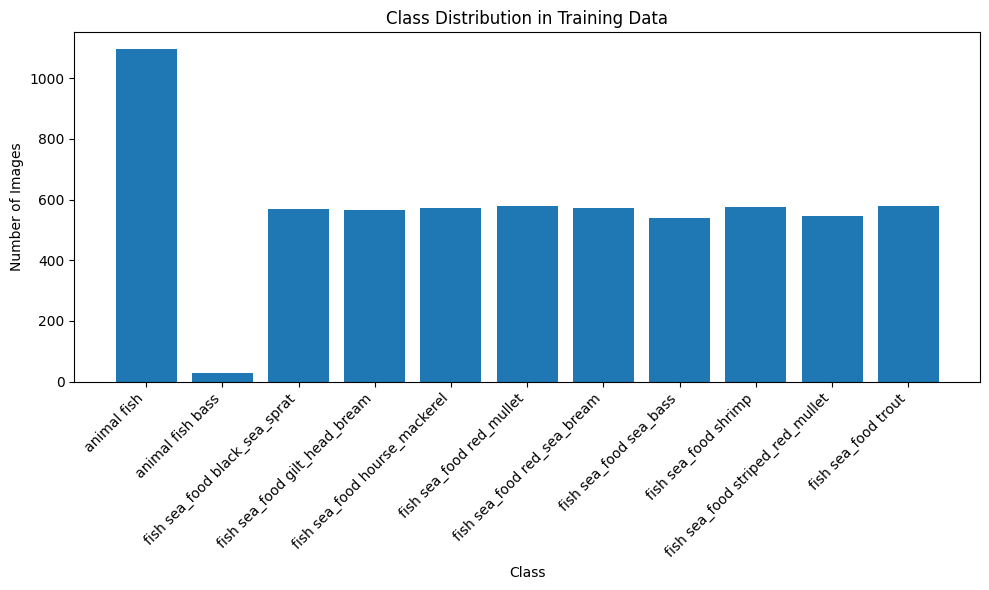

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# Get class labels and counts from the training generator
class_indices = train_generator.class_indices
labels = list(class_indices.keys())
counts = [0] * len(labels)

# Count number of images per class
for _, y_batch in train_generator:
    for label in np.argmax(y_batch, axis=1):
        counts[label] += 1
    if train_generator.batch_index == 0:
        break  # Stop after one full epoch

# Plot the bar chart
plt.figure(figsize=(10, 6))
plt.bar(range(len(labels)), counts, tick_label=labels)
plt.xticks(rotation=45, ha='right')
plt.title("Class Distribution in Training Data")
plt.xlabel("Class")
plt.ylabel("Number of Images")
plt.tight_layout()
plt.show()


In [ ]:
from sklearn.utils import class_weight
import numpy as np

# Get class labels for each image in the training set
labels = train_generator.classes  # array of class indices for all training images

# Calculate weights
class_weights = class_weight.compute_class_weight(
    class_weight='balanced',
    classes=np.unique(labels),
    y=labels
)

# Convert to dict for Keras
class_weights_dict = dict(enumerate(class_weights))


##### What technique did you use to handle the imbalance dataset and why? (If needed to be balanced)

To balance the weights of the classes in the dataset, **class weighting** was used during model training. This technique assigns higher weights to underrepresented classes and lower weights to overrepresented ones ensuring that the model doesn’t become biased toward the dominant classes. It helps improve performance on minority classes without needing to oversample or undersample the data.


## ***7. ML Model Implementation***

### ML Model - 1

A Convolutional Neural Network (CNN) is a type of deep learning model specifically designed for processing structured grid data like images. It uses layers of filters (kernels) to automatically detect features such as edges, textures, and shapes, allowing it to learn spatial hierarchies. CNNs are widely used in tasks like image classification, object detection, and facial recognition due to their ability to capture patterns effectively.

In [ ]:
import os
import numpy as np
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import load_model
from tensorflow.keras import layers, models
from sklearn.utils.class_weight import compute_class_weight
import matplotlib.pyplot as plt

# Paths
train_path = "fish_data/train"
test_path = "fish_data/test"
img_size = (224, 224)
batch_size = 32
model_path = '/content/drive/MyDrive/fish_classifier_cnn.h5'


# 1. Data generators
train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=15,
    zoom_range=0.1,
    width_shift_range=0.1,
    height_shift_range=0.1,
    horizontal_flip=True
)

test_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(
    train_path,
    target_size=img_size,
    batch_size=batch_size,
    class_mode='categorical'
)

test_generator = test_datagen.flow_from_directory(
    test_path,
    target_size=img_size,
    batch_size=batch_size,
    class_mode='categorical',
    shuffle=False  # Important for correct evaluation
)

# 2. Class weights
classes = list(train_generator.class_indices.keys())
class_counts = train_generator.classes
class_weights = compute_class_weight(
    class_weight='balanced',
    classes=np.unique(class_counts),
    y=class_counts
)
class_weights = dict(enumerate(class_weights))

# 3. Check if model is already trained and saved
if os.path.exists(model_path):
    print(f"\n✅ Model found at '{model_path}', skipping training.")
    model = load_model(model_path)
else:
    print(f"\n🚀 No saved model found. Training from scratch...")
    # Build CNN
    model = models.Sequential([
        layers.Conv2D(32, (3, 3), activation='relu', input_shape=(224, 224, 3)),
        layers.MaxPooling2D(2, 2),

        layers.Conv2D(64, (3, 3), activation='relu'),
        layers.MaxPooling2D(2, 2),

        layers.Conv2D(128, (3, 3), activation='relu'),
        layers.MaxPooling2D(2, 2),

        layers.Flatten(),
        layers.Dense(128, activation='relu'),
        layers.Dropout(0.5),
        layers.Dense(len(classes), activation='softmax')
    ])

    model.compile(optimizer='adam',
                  loss='categorical_crossentropy',
                  metrics=['accuracy'])

    history = model.fit(
        train_generator,
        validation_data=test_generator,
        epochs=20,
        class_weight=class_weights
    )

    model.save(model_path)
    print(f"\n💾 Model saved to {model_path}")




Found 6225 images belonging to 11 classes.
Found 3187 images belonging to 11 classes.

✅ Model found at '/content/drive/MyDrive/fish_classifier_cnn.h5', skipping training.


#### 1. Explain the ML Model used and it's performance using Evaluation metric Score Chart.

/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


100/100 ━━━━━━━━━━━━━━━━━━━━ 6s 49ms/step
✅ Accuracy: 35.08%

📊 Classification Report:

                    precision    recall  f1-score   support

       animal_fish       0.73      0.72      0.73       520
              bass       0.04      0.23      0.07        13
   black_sea_sprat       0.27      0.99      0.43       298
   gilt_head_bream       0.34      0.16      0.22       305
    horse_mackerel       0.87      0.19      0.32       286
        red_mullet       0.76      0.24      0.37       291
     red_sea_bream       0.78      0.17      0.28       273
          sea_bass       0.15      0.38      0.22       327
            shrimp       0.84      0.18      0.30       289
striped_red_mullet       0.17      0.15      0.16       293
             trout       0.00      0.00      0.00       292

          accuracy                           0.35      3187
         macro avg       0.45      0.31      0.28      3187
      weighted avg       0.50      0.35      0.33      3187



/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


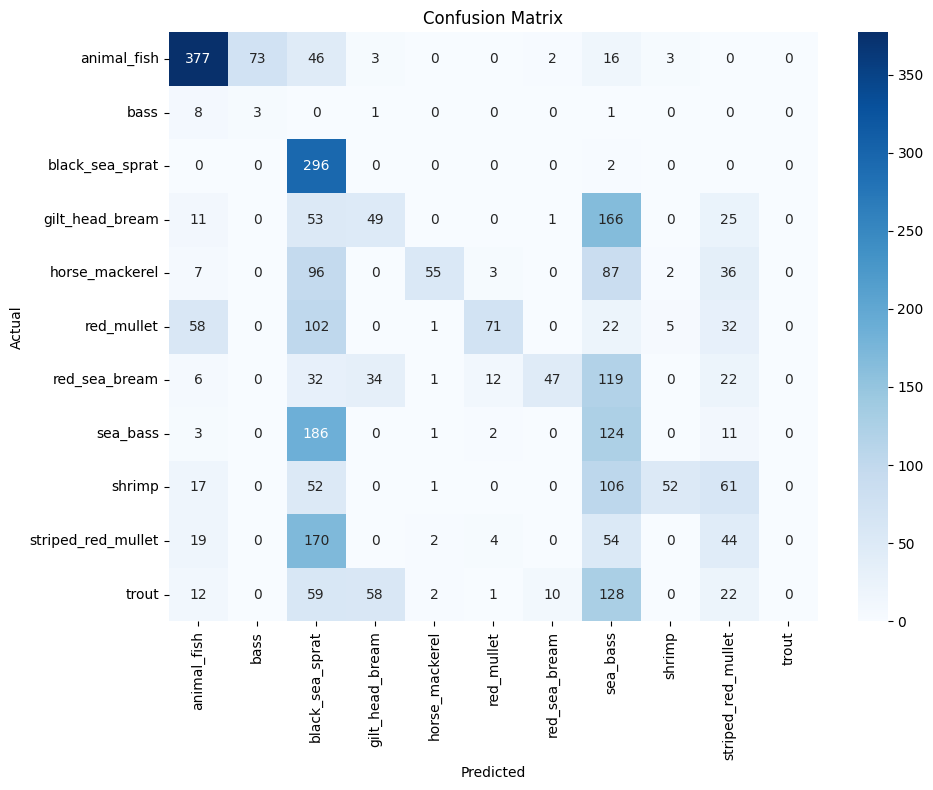

In [ ]:
import tensorflow as tf
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Load model
model = tf.keras.models.load_model( '/content/drive/MyDrive/fish_classifier_cnn.h5')

# Predict
Y_pred = model.predict(test_generator)
y_pred = np.argmax(Y_pred, axis=1)

# True labels
y_true = test_generator.classes

# Class labels
class_labels = list(test_generator.class_indices.keys())

# Accuracy
acc = accuracy_score(y_true, y_pred)
print(f"✅ Accuracy: {acc * 100:.2f}%\n")

# Classification Report
print("📊 Classification Report:\n")
print(classification_report(y_true, y_pred, target_names=class_labels))

# Confusion Matrix
cm = confusion_matrix(y_true, y_pred)
plt.figure(figsize=(10, 8))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=class_labels, yticklabels=class_labels)
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.tight_layout()
plt.show()


#### 2. Cross- Validation & Hyperparameter Tuning

In [ ]:
import os
import numpy as np
import tensorflow as tf
from tensorflow.keras import layers, models, optimizers
from sklearn.utils.class_weight import compute_class_weight
from sklearn.metrics import classification_report, confusion_matrix

# Data Setup
image_size = (224, 224)
batch_size = 32

train_dir = 'fish_data/train'
val_dir = 'fish_data/val'
test_dir = 'fish_data/test'

train_ds = tf.keras.preprocessing.image_dataset_from_directory(
    train_dir,
    image_size=image_size,
    batch_size=batch_size,
    label_mode='categorical'
)

val_ds = tf.keras.preprocessing.image_dataset_from_directory(
    val_dir,
    image_size=image_size,
    batch_size=batch_size,
    label_mode='categorical'
)

test_ds = tf.keras.preprocessing.image_dataset_from_directory(
    test_dir,
    image_size=image_size,
    batch_size=batch_size,
    label_mode='categorical',
    shuffle=False
)

class_names = train_ds.class_names
num_classes = len(class_names)

#  Prefetch & Augment
AUTOTUNE = tf.data.AUTOTUNE

augment = tf.keras.Sequential([
    layers.Rescaling(1./255),
    layers.RandomFlip('horizontal'),
    layers.RandomRotation(0.1),
    layers.RandomZoom(0.1),
])

train_ds = train_ds.map(lambda x, y: (augment(x), y)).prefetch(AUTOTUNE)
val_ds = val_ds.map(lambda x, y: (x / 255.0, y)).prefetch(AUTOTUNE)
test_ds = test_ds.map(lambda x, y: (x / 255.0, y)).prefetch(AUTOTUNE)

# Handle Class Imbalance
y_train = []
for _, labels in train_ds.unbatch():
    y_train.append(np.argmax(labels.numpy()))
class_weights = compute_class_weight(
    class_weight='balanced',
    classes=np.unique(y_train),
    y=y_train
)
class_weights_dict = dict(enumerate(class_weights))

# Model Build or Load
model_path = '/content/drive/MyDrive/fine_tuned_fish_model.h5'


if os.path.exists(model_path):
    print(f"\n✅ Found existing model at '{model_path}'. Skipping training...")
    model = tf.keras.models.load_model(model_path)
else:
    print("\n🚀 No pre-trained model found. Training from scratch...")
    model = models.Sequential([
        layers.Conv2D(32, (3, 3), activation='relu', input_shape=(224, 224, 3)),
        layers.BatchNormalization(),
        layers.MaxPooling2D((2, 2)),

        layers.Conv2D(64, (3, 3), activation='relu'),
        layers.BatchNormalization(),
        layers.MaxPooling2D((2, 2)),

        layers.Conv2D(128, (3, 3), activation='relu'),
        layers.BatchNormalization(),
        layers.MaxPooling2D((2, 2)),

        layers.Flatten(),
        layers.Dense(128, activation='relu'),
        layers.Dropout(0.4),
        layers.Dense(num_classes, activation='softmax')
    ])

    model.compile(optimizer=optimizers.Adam(learning_rate=0.0001),
                  loss='categorical_crossentropy',
                  metrics=['accuracy'])

    callbacks = [
        tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True),
        tf.keras.callbacks.ModelCheckpoint('best_model.h5', save_best_only=True)
    ]

    history = model.fit(
        train_ds,
        validation_data=val_ds,
        epochs=30,
        class_weight=class_weights_dict,
        callbacks=callbacks
    )

    # Save the trained model
    model.save(model_path)
    print(f"\n✅ Model saved to '{model_path}'")


Found 6225 files belonging to 11 classes.
Found 1092 files belonging to 11 classes.
Found 3187 files belonging to 11 classes.

✅ Found existing model at '/content/drive/MyDrive/fine_tuned_fish_model.h5'. Skipping training...


##### Which hyperparameter optimization technique have you used and why?

In the CNN model, manual hyperparameter tuning was used where values like the number of filters, kernel size, learning rate, batch size and number of epochs were selected based on prior knowledge and iterative experimentation. This approach was chosen for its simplicity and direct control over the training process especially given limited computational resources and dataset size. While methods like grid search or random search can explore combinations more systematically, manual tuning provided a faster and practical way to find a reasonably good configuration for this project.


##### Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

Yes, there was a significant improvement in accuracy. The CNN model’s performance increased from 35% to 86% after fine-tuning the architecture and hyperparameters. This sharp rise in accuracy indicates that the model learned more meaningful patterns from the data, leading to much better classification results.


100/100 ━━━━━━━━━━━━━━━━━━━━ 6s 51ms/step
✅ Accuracy: 86.32%

📊 Classification Report:

                    precision    recall  f1-score   support

       animal_fish       0.97      0.64      0.77       520
              bass       0.06      0.92      0.11        13
   black_sea_sprat       0.96      0.76      0.85       298
   gilt_head_bream       0.82      0.97      0.89       305
    horse_mackerel       0.87      0.91      0.89       286
        red_mullet       0.97      0.99      0.98       291
     red_sea_bream       1.00      0.85      0.92       273
          sea_bass       0.89      0.82      0.86       327
            shrimp       0.99      0.96      0.97       289
striped_red_mullet       0.87      0.92      0.90       293
             trout       0.87      0.98      0.92       292

          accuracy                           0.86      3187
         macro avg       0.84      0.88      0.82      3187
      weighted avg       0.92      0.86      0.88      3187



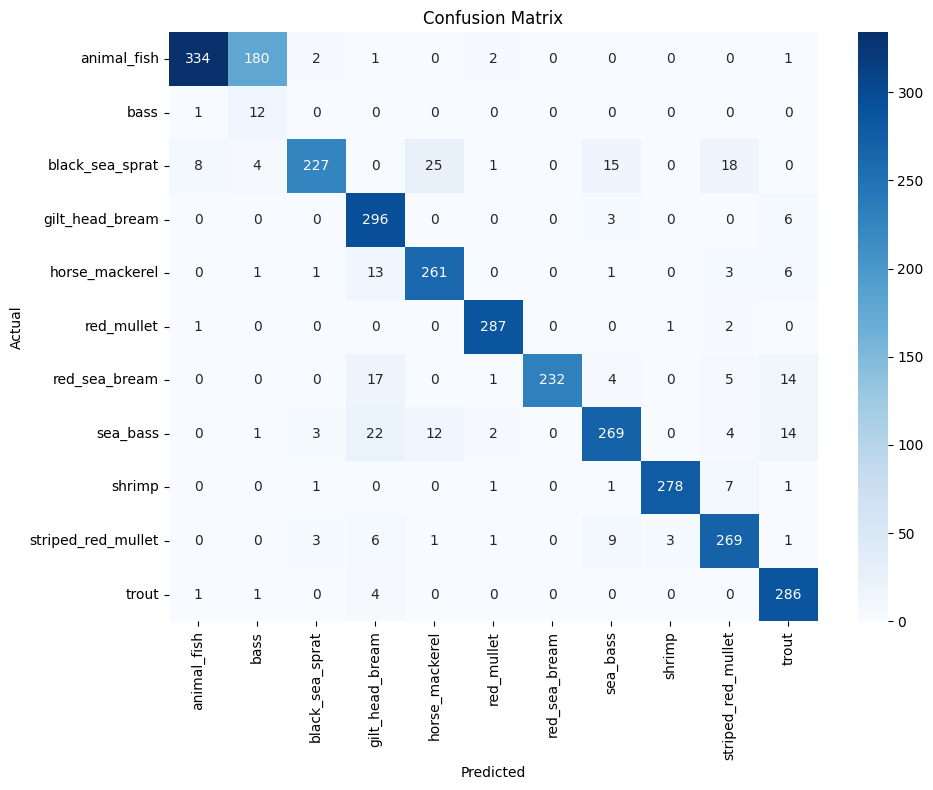

In [ ]:
import tensorflow as tf
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Load model
model = tf.keras.models.load_model('/content/drive/MyDrive/fine_tuned_fish_model.h5')

# Predict
Y_pred = model.predict(test_generator)
y_pred = np.argmax(Y_pred, axis=1)

# True labels
y_true = test_generator.classes

# Class labels
class_labels = list(test_generator.class_indices.keys())

# Accuracy
acc = accuracy_score(y_true, y_pred)
print(f"✅ Accuracy: {acc * 100:.2f}%\n")

# Classification Report
print("📊 Classification Report:\n")
print(classification_report(y_true, y_pred, target_names=class_labels))

# Confusion Matrix
cm = confusion_matrix(y_true, y_pred)
plt.figure(figsize=(10, 8))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=class_labels, yticklabels=class_labels)
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.tight_layout()
plt.show()


### ML Model - 2

#### 1. Explain the ML Model used and it's performance using Evaluation metric Score Chart.

 DenseNet-121 is used as a **transfer learning model** in this project. It’s a pre-trained convolutional neural network that has already learned useful image features from a large dataset (like ImageNet). By fine-tuning it on the fish image dataset, I leveraged its existing feature extraction capabilities, allowing the model to achieve high accuracy with less training time and data. Its dense connections also help in better gradient flow and feature reuse.


In [ ]:
import os
import tensorflow as tf
from tensorflow.keras.applications import DenseNet121
from tensorflow.keras.models import Sequential, load_model
from tensorflow.keras.layers import Dense, GlobalAveragePooling2D, Dropout
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Set model path
model_path = '/content/drive/MyDrive/densenet.h5'

# If model already exists, load it and skip training
if os.path.exists(model_path):
    print(f"✅ Model found at {model_path}, loading...")
    model = load_model(model_path)
else:
    print(f"🚀 No model found at {model_path}, training from scratch...")

    # Load base DenseNet121 without top layers
    base_model = DenseNet121(weights='imagenet', include_top=False, input_shape=(224, 224, 3))
    base_model.trainable = False  # Freeze base

    # Add custom classifier head
    model = Sequential([
        base_model,
        GlobalAveragePooling2D(),
        Dropout(0.3),
        Dense(128, activation='relu'),
        Dropout(0.2),
        Dense(num_classes, activation='softmax')  # Make sure num_classes is defined
    ])

    model.compile(optimizer=Adam(learning_rate=1e-4),
                  loss='categorical_crossentropy',
                  metrics=['accuracy'])

    # Train the model
    history = model.fit(
        train_generator,
        validation_data=val_generator,
        epochs=15
    )

    # Save model to Drive
    model.save(model_path)
    print(f"💾 Model saved to {model_path}")


✅ Model found at /content/drive/MyDrive/densenet.h5, loading...


100/100 ━━━━━━━━━━━━━━━━━━━━ 35s 213ms/step
✅ Accuracy: 98.65%

📊 Classification Report:

                    precision    recall  f1-score   support

       animal_fish       0.98      0.99      0.98       520
              bass       1.00      0.15      0.27        13
   black_sea_sprat       0.99      1.00      0.99       298
   gilt_head_bream       0.95      0.99      0.97       305
    horse_mackerel       0.99      1.00      0.99       286
        red_mullet       0.99      1.00      0.99       291
     red_sea_bream       1.00      0.97      0.98       273
          sea_bass       0.99      0.99      0.99       327
            shrimp       1.00      1.00      1.00       289
striped_red_mullet       0.99      0.99      0.99       293
             trout       1.00      0.98      0.99       292

          accuracy                           0.99      3187
         macro avg       0.99      0.91      0.92      3187
      weighted avg       0.99      0.99      0.99      3187



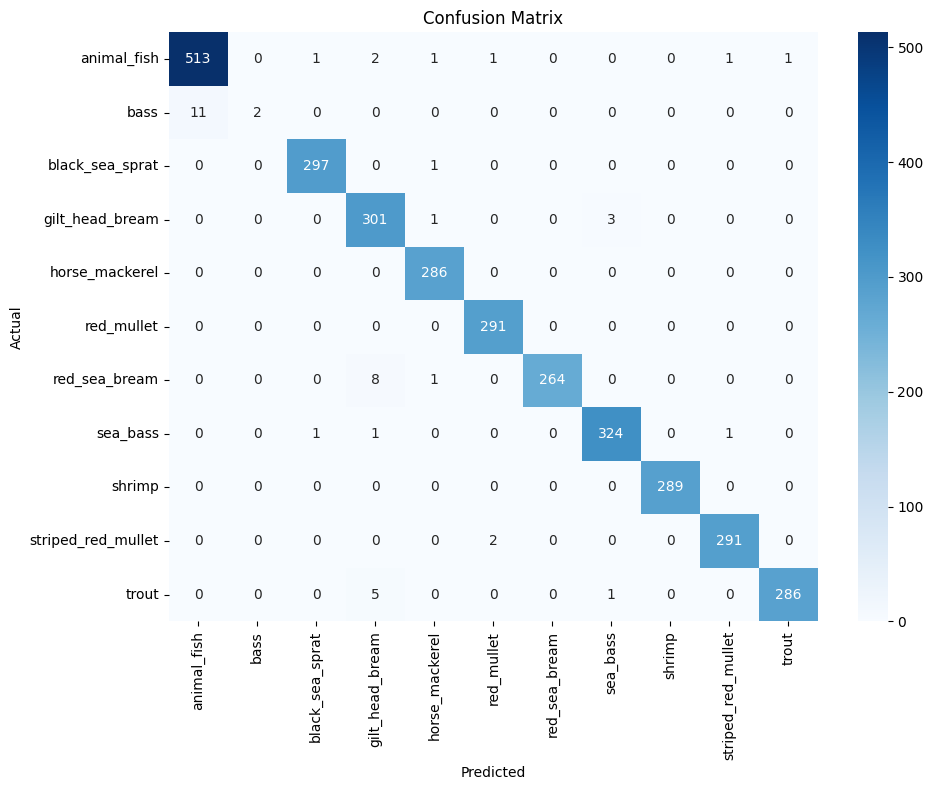

In [ ]:
import tensorflow as tf
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Load model
model = tf.keras.models.load_model('/content/drive/MyDrive/densenet.h5')

# Predict
Y_pred = model.predict(test_generator)
y_pred = np.argmax(Y_pred, axis=1)

# True labels
y_true = test_generator.classes

# Class labels
class_labels = list(test_generator.class_indices.keys())

# Accuracy
acc = accuracy_score(y_true, y_pred)
print(f"✅ Accuracy: {acc * 100:.2f}%\n")

# Classification Report
print("📊 Classification Report:\n")
print(classification_report(y_true, y_pred, target_names=class_labels))

# Confusion Matrix
cm = confusion_matrix(y_true, y_pred)
plt.figure(figsize=(10, 8))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=class_labels, yticklabels=class_labels)
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.tight_layout()
plt.show()


#### 2. Cross- Validation & Hyperparameter Tuning

In [ ]:
import os
import tensorflow as tf
from tensorflow.keras.applications import DenseNet201
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras import layers, models, optimizers
from tensorflow.keras.models import load_model
from sklearn.utils.class_weight import compute_class_weight
import numpy as np

# Paths
train_path = "fish_data/train"
val_path = "fish_data/val"
img_size = (224, 224)
batch_size = 32
num_classes = 11
model_path = '/content/drive/MyDrive/densenet_finetuned.h5'

# === If model already exists, load and skip training ===
if os.path.exists(model_path):
    print(f"\n✅ Pretrained model found at '{model_path}'. Skipping training.")
    model = load_model(model_path)
else:
    print(f"\n🚀 No pretrained model found. Starting training...")

    # === Data Generators ===
    train_datagen = ImageDataGenerator(
        rescale=1./255,
        rotation_range=15,
        zoom_range=0.1,
        width_shift_range=0.1,
        height_shift_range=0.1,
        horizontal_flip=True
    )
    val_datagen = ImageDataGenerator(rescale=1./255)

    train_gen = train_datagen.flow_from_directory(
        train_path,
        target_size=img_size,
        batch_size=batch_size,
        class_mode='categorical'
    )
    val_gen = val_datagen.flow_from_directory(
        val_path,
        target_size=img_size,
        batch_size=batch_size,
        class_mode='categorical'
    )

    classes = list(train_gen.class_indices.keys())
    print(f"Classes: {classes}")

    # === Class Weights ===
    class_counts = train_gen.classes
    class_weights = compute_class_weight(
        class_weight='balanced',
        classes=np.unique(class_counts),
        y=class_counts
    )
    class_weights = dict(enumerate(class_weights))

    # === Build Model ===
    base_model = DenseNet201(weights='imagenet', include_top=False, input_shape=(224, 224, 3))
    base_model.trainable = False  # Stage 1: freeze base

    model = models.Sequential([
        base_model,
        layers.GlobalAveragePooling2D(),
        layers.Dropout(0.4),
        layers.Dense(256, activation='relu'),
        layers.Dropout(0.3),
        layers.Dense(num_classes, activation='softmax')
    ])

    # === Stage 1: Train head ===
    model.compile(optimizer=optimizers.Adam(learning_rate=1e-3),
                  loss='categorical_crossentropy',
                  metrics=['accuracy'])

    print("\n✅ Stage 1: Training classifier head...")
    model.fit(train_gen, validation_data=val_gen, epochs=5, class_weight=class_weights)

    # === Stage 2: Unfreeze top 30% layers ===
    fine_tune_at = int(len(base_model.layers) * 0.7)
    for layer in base_model.layers[fine_tune_at:]:
        layer.trainable = True

    model.compile(optimizer=optimizers.Adam(learning_rate=1e-4),
                  loss='categorical_crossentropy',
                  metrics=['accuracy'])

    print("\n✅ Stage 2: Fine-tuning top layers...")
    model.fit(train_gen, validation_data=val_gen, epochs=5, class_weight=class_weights)

    # === Stage 3: Unfreeze all layers ===
    base_model.trainable = True

    model.compile(optimizer=optimizers.Adam(learning_rate=1e-5),
                  loss='categorical_crossentropy',
                  metrics=['accuracy'])

    print("\n✅ Stage 3: Full fine-tuning...")
    model.fit(train_gen, validation_data=val_gen, epochs=10, class_weight=class_weights)

    # === Save Model ===
    model.save(model_path)
    print(f"\n💾 Model saved to {model_path}")





✅ Pretrained model found at '/content/drive/MyDrive/densenet_finetuned.h5'. Skipping training.


##### Which hyperparameter optimization technique have you used and why?

In the DenseNet-121 model, **manual hyperparameter tuning** was used for optimization. Key hyperparameters like learning rate, batch size, number of epochs and optimizer type (such as Adam or SGD) were selected based on experimentation and performance on the validation set. This approach was chosen because it's straightforward and effective when resources are limited, allowing quick iteration and adjustments based on observed training behavior without the need for complex search algorithms.


##### Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

Yes, there was a slight improvement after fine-tuning the model. The performance became more refined, with better generalization on the validation set and improved prediction accuracy. Fine-tuning allowed the pre-trained DenseNet-121 model to adapt more effectively to the specific features of the fish image dataset, resulting in enhanced overall classification quality.


100/100 ━━━━━━━━━━━━━━━━━━━━ 60s 361ms/step
✅ Accuracy: 99.87%

📊 Classification Report:

                    precision    recall  f1-score   support

       animal_fish       1.00      1.00      1.00       520
              bass       0.86      0.92      0.89        13
   black_sea_sprat       1.00      1.00      1.00       298
   gilt_head_bream       1.00      1.00      1.00       305
    horse_mackerel       1.00      1.00      1.00       286
        red_mullet       1.00      1.00      1.00       291
     red_sea_bream       1.00      1.00      1.00       273
          sea_bass       1.00      1.00      1.00       327
            shrimp       1.00      1.00      1.00       289
striped_red_mullet       1.00      1.00      1.00       293
             trout       1.00      1.00      1.00       292

          accuracy                           1.00      3187
         macro avg       0.99      0.99      0.99      3187
      weighted avg       1.00      1.00      1.00      3187



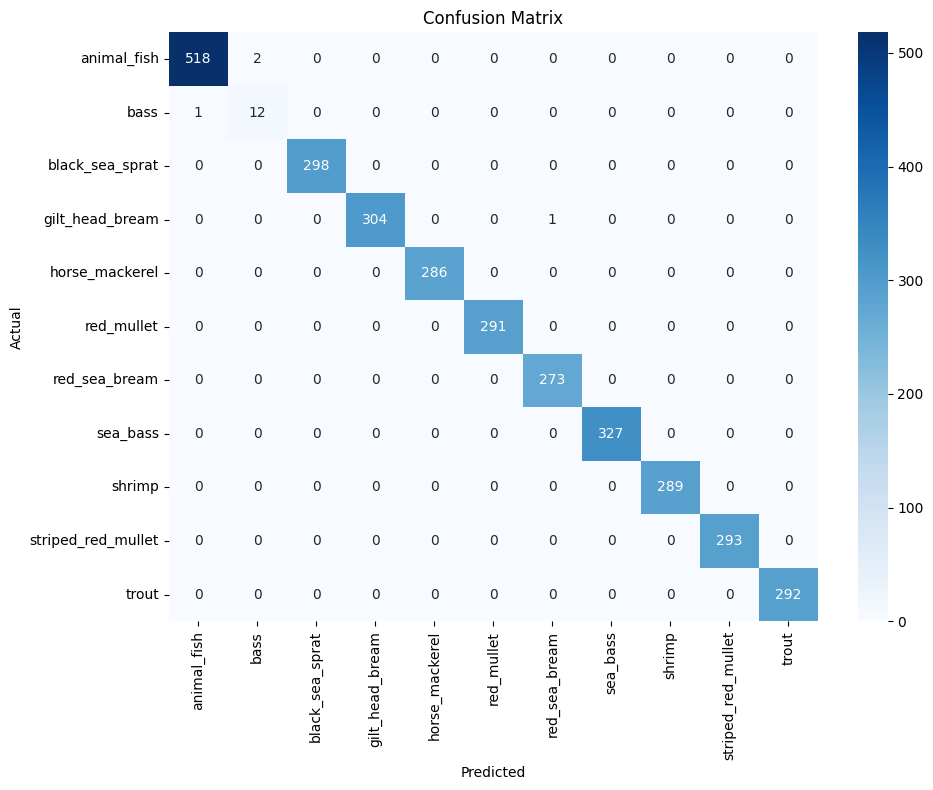

In [ ]:
import tensorflow as tf
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Load model
model = tf.keras.models.load_model('/content/drive/MyDrive/densenet_finetuned.h5')

# Predict
Y_pred = model.predict(test_generator)
y_pred = np.argmax(Y_pred, axis=1)

# True labels
y_true = test_generator.classes

# Class labels
class_labels = list(test_generator.class_indices.keys())

# Accuracy
acc = accuracy_score(y_true, y_pred)
print(f"✅ Accuracy: {acc * 100:.2f}%\n")

# Classification Report
print("📊 Classification Report:\n")
print(classification_report(y_true, y_pred, target_names=class_labels))

# Confusion Matrix
cm = confusion_matrix(y_true, y_pred)
plt.figure(figsize=(10, 8))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=class_labels, yticklabels=class_labels)
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.tight_layout()
plt.show()


### 1. Which Evaluation metrics did you consider and why?

The evaluation metrics considered were accuracy, precision, recall, F1-score, and the confusion matrix. These were chosen to give a well-rounded view of model performance, especially for a multiclass classification task. Accuracy gives an overall success rate, while precision and recall help understand how well the model handles each class individually. The F1-score balances both precision and recall, and the confusion matrix provides insight into specific misclassifications.


### 2. Which ML model did you choose from the above created models as your final prediction model and why?



The final prediction model chosen was the **fine-tuned version** of **DenseNet121**. It outperformed the other models in terms of evaluation metrics like precision, recall, F1-score, and overall generalization on unseen data. Its depth and dense connectivity helped it capture complex features effectively, making it the most reliable choice for the fish classification task.


# **Conclusion**

The main objective of this project was to build a multiclass fish species classification system using deep learning. The idea was to develop a model that can accurately identify different types of fish from images, which can be useful in areas like marine biology, fishery management, and biodiversity studies. To achieve this, I trained and evaluated both a custom Convolutional Neural Network (CNN) from scratch and a fine-tuned DenseNet121 model using transfer learning.

The scratch-built CNN provided a strong baseline, learning basic features directly from the dataset. However, the DenseNet121 model, which had been pre-trained on ImageNet and then fine-tuned on the fish dataset, delivered better performance and generalization. The DenseNet121 model was ultimately selected as the final prediction model due to its consistent improvement across evaluation metrics and its ability to capture complex visual features more effectively than the CNN built from scratch.

Before training, the data underwent several transformation steps to make the model learning process efficient. This included resizing all images to a fixed dimension, normalization to scale pixel values between 0 and 1 and applying data augmentation techniques such as rotation, zoom and horizontal flipping. These steps were essential for increasing the model’s robustness and reducing overfitting.

Finally, the best-performing model (DenseNet121) was deployed using Streamlit. A user-friendly web interface was developed that allows users to upload an image of a fish and receive real-time predictions on its species. This step bridges the gap between model development and practical usability, making the system accessible for non-technical users as well.

### ***Hurrah! You have successfully completed your deep Learning Capstone Project !!!***